In [ ]:
import csv
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

drive.mount('/content/drive')
playercsv = pd.read_csv('/content/drive/MyDrive/EECS4412/wc_players.csv');
playercsv = pd.DataFrame(playercsv)
selectcol = playercsv[['k','d','a','dmgtochamps','dmgtochampsperminute','kpm','minionkills']]
selectcol.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,k,d,a,dmgtochamps,dmgtochampsperminute,kpm,minionkills
0,0,4,4,11588,436.733668,0.000000,180
1,1,4,5,7925,298.680905,0.037688,35
2,1,5,6,7557,284.811558,0.037688,186
3,3,4,1,7369,277.726131,0.113065,219
4,2,5,2,2694,101.532663,0.075377,12


In [ ]:
selectcopy = selectcol.copy(deep=True)
filter = selectcopy[(np.abs(stats.zscore(selectcopy)) < 3).all(axis=1)] #Drop the row with outliers
filter = filter.dropna().reset_index(drop=True)#Drop all the instances with missing values & reset the indeces
filter = filter.drop(labels = range(1000,len(filter)),axis = 0) #limit the row to 1000 rows
print('The total instances is: '+str(len(filter)))
filter.to_csv("T2Org.csv")
filter.head()

The total instances is: 1000


,k,d,a,dmgtochamps,dmgtochampsperminute,kpm,minionkills
0,0,4,4,11588,436.733668,0.000000,180
1,1,4,5,7925,298.680905,0.037688,35
2,1,5,6,7557,284.811558,0.037688,186
3,3,4,1,7369,277.726131,0.113065,219
4,2,5,2,2694,101.532663,0.075377,12


In [ ]:
names = filter.columns
nordata = preprocessing.normalize(filter)#normalization the data
filter = pd.DataFrame(nordata,columns=names)
filter.head()

,k,d,a,dmgtochamps,dmgtochampsperminute,kpm,minionkills
0,0.000000,0.000345,0.000345,0.999170,0.037657,0.000000,0.015520
1,0.000126,0.000504,0.000630,0.999280,0.037661,0.000005,0.004413
2,0.000132,0.000661,0.000793,0.998988,0.037650,0.000005,0.024588
3,0.000407,0.000542,0.000136,0.998850,0.037645,0.000015,0.029685
4,0.000742,0.001855,0.000742,0.999278,0.037661,0.000028,0.004451


,0,1,2,3,4,5,6
0,-0.001092,-0.006559,-0.000413,0.000029,-0.000026,-0.000250,-1.027910e-06
1,-0.012181,-0.007172,-0.000212,0.000232,0.000218,-0.000127,-4.950428e-07
2,0.007956,-0.006066,0.000188,0.000126,-0.000268,-0.000085,-3.436744e-07
3,0.013054,-0.005782,-0.000424,0.000117,-0.000268,0.000187,1.020612e-06
4,-0.012144,-0.007183,0.000190,0.001417,-0.000157,0.000586,2.720109e-06


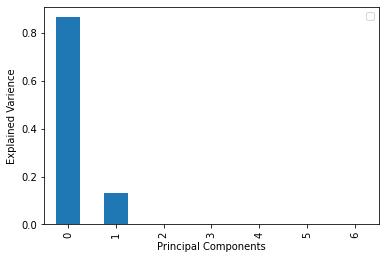

In [ ]:
pcafilter = filter.copy(deep=True)
names = filter.columns
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(pcafilter))

pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')
df_pca.head()

In [ ]:
selectpca = df_pca.iloc[:,0:2]

sum of squared errors for k=3: 6.995589834027455e-05
            k         d  Clusters
0    0.000000  0.000345         0
1    0.000126  0.000504         2
2    0.000132  0.000661         2
3    0.000407  0.000542         2
4    0.000742  0.001855         1
..        ...       ...       ...
995  0.000231  0.000231         0
996  0.000258  0.000344         0
997  0.000212  0.001059         2
998  0.000145  0.000434         2
999  0.000364  0.000273         0

[1000 rows x 3 columns]


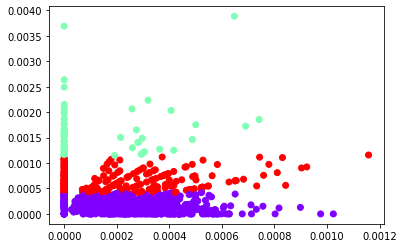

In [ ]:
filter.head()
selectdata = filter.iloc[:,0:2]
selectdata.to_csv("T2Mod.csv")
kmeans = KMeans(n_clusters=3)
kmeans.fit(selectdata)
id_cluster = kmeans.fit_predict(selectdata)

data_with_clusters = filter.copy(deep=True)
data_with_clusters['Clusters'] = id_cluster
plt.scatter(data_with_clusters['k'],data_with_clusters['d'],c=data_with_clusters['Clusters'],cmap='rainbow')
print('sum of squared errors for k=3: '+str(kmeans.inertia_))
print(data_with_clusters[['k','d','Clusters']])

sum of squared errors for k=4: 5.6481261036465626e-05
            k         d  Clusters
0    0.000000  0.000345         2
1    0.000126  0.000504         2
2    0.000132  0.000661         2
3    0.000407  0.000542         2
4    0.000742  0.001855         3
..        ...       ...       ...
995  0.000231  0.000231         0
996  0.000258  0.000344         2
997  0.000212  0.001059         1
998  0.000145  0.000434         2
999  0.000364  0.000273         0

[1000 rows x 3 columns]


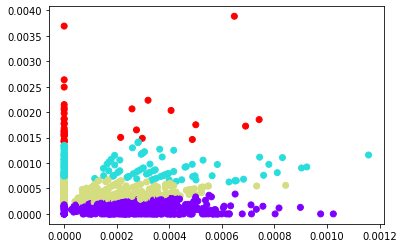

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(selectdata)
id_cluster = kmeans.fit_predict(selectdata)
data_with_clusters0 = filter.copy(deep=True)
data_with_clusters0['Clusters'] = id_cluster
plt.scatter(data_with_clusters0['k'],data_with_clusters0['d'],c=data_with_clusters0['Clusters'],cmap='rainbow')
print('sum of squared errors for k=4: '+str(kmeans.inertia_))
print(data_with_clusters0[['k','d','Clusters']])

sum of squared errors for k=5: 4.5721146192461414e-05
            k         d  Clusters
0    0.000000  0.000345         1
1    0.000126  0.000504         2
2    0.000132  0.000661         2
3    0.000407  0.000542         2
4    0.000742  0.001855         0
..        ...       ...       ...
995  0.000231  0.000231         1
996  0.000258  0.000344         1
997  0.000212  0.001059         3
998  0.000145  0.000434         2
999  0.000364  0.000273         4

[1000 rows x 3 columns]


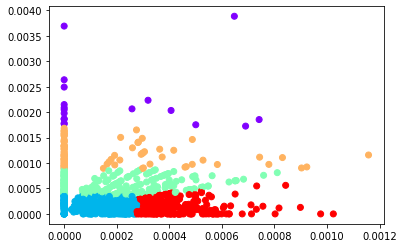

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(selectdata)
id_cluster = kmeans.fit_predict(selectdata)
data_with_clusters1 = filter.copy(deep=True)
data_with_clusters1['Clusters'] = id_cluster
plt.scatter(data_with_clusters1['k'],data_with_clusters1['d'],c=data_with_clusters1['Clusters'],cmap='rainbow')
print('sum of squared errors for k=5: '+str(kmeans.inertia_))
print(data_with_clusters1[['k','d','Clusters']])

In [ ]:
# since the k = 5 have the lowest SSE, we choose it
data_with_clusters1['Clusters'].to_csv("T2Class.csv")